In [64]:
import matplotlib.pyplot as plt
from scipy import misc
from moviepy.editor import VideoFileClip

from skimage import io
from skimage import color
from skimage import feature
from skimage import filters
from skimage import transform
from skimage import data

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
clip1 = VideoFileClip('videos/solidWhiteRight.mp4')
clip2 = VideoFileClip('videos/solidYellowLeft.mp4')

In [66]:
def filter(im):
    X = im.shape[1]
    Y = im.shape[0]
    im = filters.gaussian(im, 4)
    im = color.rgb2gray(im)    
    im = feature.canny(im, sigma = 4)    
    im[0:int(Y*0.6),:] = 0
    
    image = np.zeros((im.shape)).astype(int)
    image[im == True] = 255
    return image

In [67]:
im_list = []
edges_list = []

for t in range(30):
    im_list.append(clip1.get_frame(t/4))
    edges_list.append(filter(clip1.get_frame(t/10)))
    im_list.append(clip2.get_frame(t/4))
    edges_list.append(filter(clip2.get_frame(t/10)))    


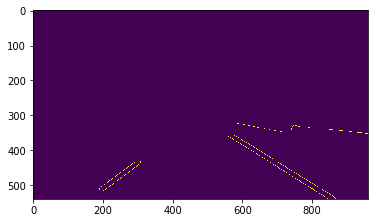

In [68]:
plt.imshow(filter(im_list[0]))

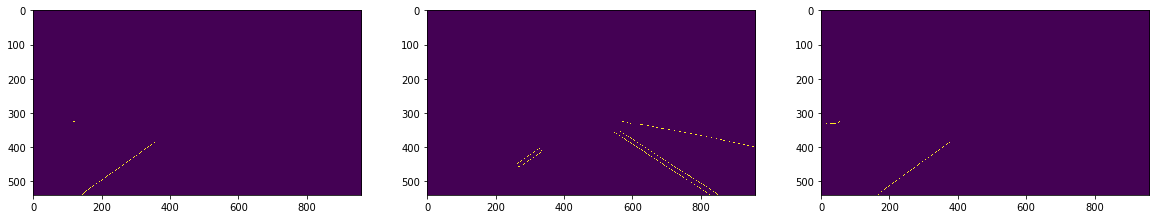

In [70]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(edges_list[45])
plt.subplot(1,3,2)
plt.imshow(edges_list[46])
plt.subplot(1,3,3)
plt.imshow(edges_list[47])

In [71]:
SAVE_DIR = './lane_images'
for i, im in enumerate(im_list):
    io.imsave("{}/camera{}.png".format(SAVE_DIR, i), im_list[i])
    io.imsave("{}/lane{}.png".format(SAVE_DIR, i), edges_list[i])


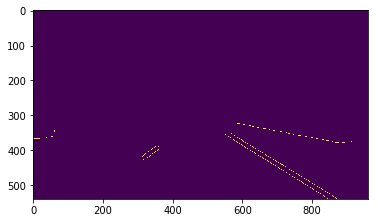